March 15, 2018

** Vicki Schweickart **
## Final Project for IT FDN 100B

** Introduction **

For my final project I wanted to analyze data from the Myers-Briggs Personality Test.  I was hoping for a large dataset that would include actual scores for each individual for each of the 4 personality axes.  Unable to find that, I settled for a dataset on [Kaggel.com](http://www.Kaggel.com) that included the 'type index' for 8675 people plus content from 50 of their recent posts on the website [PersonalityCafe forum](http://personalitycafe.com/forum/).

** Background **

The Myers-Briggs Type Index (MBTI) is a personality test developed in the 1940's that is widely used around the globe to help companies better understand their employees’ strengths, weaknesses and the way they perceive and process information.
The MBTI measures an individual's position along each of 4 axes or dichotomies. High scores (at the ends of each axis) show strong preference for one mode of psychological function over the other, while low scores (in the mid-range of the axis) show only slight preference.

* Introversion (I) – Extroversion (E)
* Intuition (N) – Sensing (S)
* Thinking (T) – Feeling (F)
* Judging (J) – Perceiving (P)

Regardless of their degree of preference, each individual is assigned a single letter for each of the 4 axes indicating the direction of their preference.  The 4 letter acronym that results is their 'type index.' Thus the MBTI groups individuals into 16 'types' based on their personality.

  

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
# read the dataset into a data frame
df = pd.read_csv('mbti_1.csv')

In [3]:
# take a look at the data (note that each post is seperated by 3 pipe characters: '|||')
df.head(10)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [4]:
# What are the 16 types?
df['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [5]:
# How evenly represented are the 16 types?
df['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

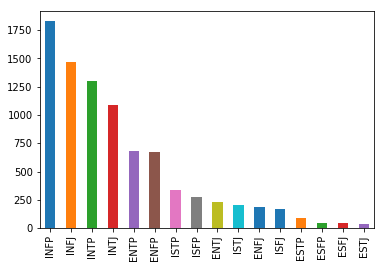

In [6]:
# Not evenly distrubuted at all!  I don't think we'll be drawing any conclusions from this data set lol!
# let's graph it:
df['type'].value_counts().plot(kind='bar')

In [7]:
# I wrote a function to determine the average length of posts made by each individual
# first it splits the full string into individual posts, determines the length of each, and then averages those lengths

def avg_words(row):
    word_count = []
    tot = 0
    for i in row.split('|||'):
        word_count.append(len(i.split()))
    for x in word_count:
        tot += x
    return tot/len(word_count)

# While I was trying to figure out how to apply my function to each row I learned something new: lambda functions

df['avg_length'] = df['posts'].apply(lambda x: avg_words(x))
print(df.head(10))

   type                                              posts  avg_length
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...       12.10
1  ENTP  'I'm finding the lack of me in these posts ver...       24.38
2  INTP  'Good one  _____   https://www.youtube.com/wat...       17.70
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...       22.26
4  ENTJ  'You're fired.|||That's another silly misconce...       20.32
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...       30.80
6  INFJ  'No, I can't draw on my own nails (haha). Thos...       27.56
7  INTJ  'I tend to build up a collection of things on ...       25.44
8  INFJ  I'm not sure, that's a good question. The dist...       15.74
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...       25.64


** Lambda Functions **

Instead of writing a named function, you can use a lambda function in-line to perform the same operation.  
Read more about it [here](http://www.secnetix.de/olli/Python/lambda_functions.hawk).

Lambda acts just like a regular function except it has a different format and doesn't need a return statement

regular function: ** def a(x): return x + 1 **

lambda function: ** b = lambda x: x + 1 **

In [8]:
# both of these will return the same value

def a(x): return x + 1

b = lambda x: x + 1

a(5) == b(5)

True

Lambda is usually used in conjunction other functions such as map(), filter(), or reduce(), where it will apply the function to each item in a list.

In [9]:
mult3 = filter(lambda x: x % 3 == 0, [1, 2, 3, 4, 5, 6, 7, 8, 9])
list(mult3)

[3, 6, 9]

Turns out lambda functions are quite controversial - everyone has an opinion!  Many think they should be avoided by using list comprehension instead.  Others argue there is a valid role for lambda functions in certain situations.  Whatever...
I still think they're cool.

Here is an example of a very clever lambda function that completely replaces the function I wrote above:

In [10]:
# this tidy shortcut takes the entire string, splits it into words and then divides by 50

df['avg_length_2'] = df['posts'].apply(lambda x: len(x.split())/50)
print(df.head(10))


   type                                              posts  avg_length  \
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...       12.10   
1  ENTP  'I'm finding the lack of me in these posts ver...       24.38   
2  INTP  'Good one  _____   https://www.youtube.com/wat...       17.70   
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...       22.26   
4  ENTJ  'You're fired.|||That's another silly misconce...       20.32   
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...       30.80   
6  INFJ  'No, I can't draw on my own nails (haha). Thos...       27.56   
7  INTJ  'I tend to build up a collection of things on ...       25.44   
8  INFJ  I'm not sure, that's a good question. The dist...       15.74   
9  INTP  'https://www.youtube.com/watch?v=w8-egj0y8Qs||...       25.64   

   avg_length_2  
0         11.12  
1         23.40  
2         16.72  
3         21.28  
4         19.34  
5         29.82  
6         26.58  
7         24.46  
8         14.76  
9    

Notice that the results are slightly different!  My function may be more cumbersome, but it gives more accurate results because it removes the delimiter (|||) and counts each post seperately.  This shortcut method underestimates the total count by 50 words because it counts the last word of each post + '|||' + first word of next post as a single word. 

** Conclusion: **

Clearly, I didn't even scratch the surface of this MBTI data set!  Most of the folks using this data were working on Machine Learing.  They were trying to build algorithms that could predict what MBTI type a person is by looking at the content of their posts.

But I had a good time and I learned a few things along the way.  Hope you did too!